In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df_grafico_futebol = pd.read_csv('./dataset_futebol.csv').head(100)

# Configurar Pandas para exibir todas as linhas e colunas
df_sem_colunas = df_grafico_futebol.drop(columns=['ID_Jogador', 'Número_da_Camisa','Nome_Jogador'])
df_sem_colunas[['Altura_cm', 'Peso_kg']] = df_sem_colunas[['Altura_cm', 'Peso_kg']].round(2)
df_sem_colunas['Partidas_Jogadas']  = df_sem_colunas[['Minutos_Jogados']].apply(lambda x: x//90)
df_sem_colunas

,Posição,Gols_Marcados,Assistências,Faltas_Cometidas,Minutos_Jogados,Altura_cm,Peso_kg,Partidas_Jogadas
0,Goleiro,21,8,3,2690,162.80,60.71,29
1,Meia,27,2,1,1416,185.61,84.10,15
2,Defensor,19,9,1,3375,170.85,74.59,37
3,Meia,0,18,8,3152,183.71,75.46,35
4,Atacante,9,2,4,1996,187.21,82.58,22
...,...,...,...,...,...,...,...,...
95,Meia,17,11,8,2859,197.46,78.48,31
96,Goleiro,18,14,4,3812,195.04,99.66,42
97,Defensor,21,14,0,944,171.11,98.83,10
98,Goleiro,4,5,9,2845,194.06,97.69,31


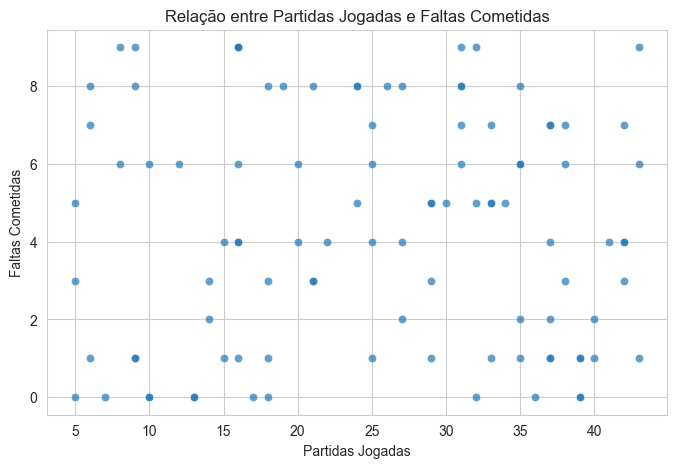

In [52]:
df_sem_colunas['Partidas_Jogadas'] = df_sem_colunas['Minutos_Jogados'] // 90

# Configuração do estilo do gráfico
sns.set_style("whitegrid")

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_sem_colunas, x="Partidas_Jogadas", y="Faltas_Cometidas", alpha=0.7)

# Adicionando títulos e rótulos
plt.title("Relação entre Partidas Jogadas e Faltas Cometidas")
plt.xlabel("Partidas Jogadas")
plt.ylabel("Faltas Cometidas")

# Exibindo o gráfico
plt.show()

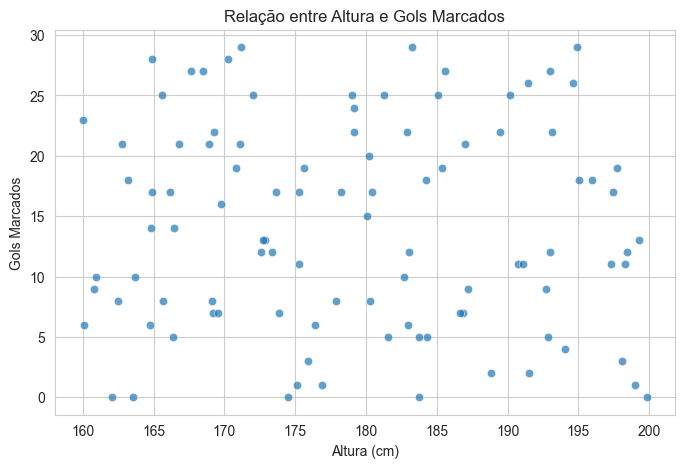

In [53]:
# Configuração do estilo do gráfico
sns.set_style("whitegrid")

# Criando o gráfico de dispersão para Gols por Altura
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_sem_colunas, x="Altura_cm", y="Gols_Marcados", alpha=0.7)

# Adicionando títulos e rótulos
plt.title("Relação entre Altura e Gols Marcados")
plt.xlabel("Altura (cm)")
plt.ylabel("Gols Marcados")

# Exibindo o gráfico
plt.show()

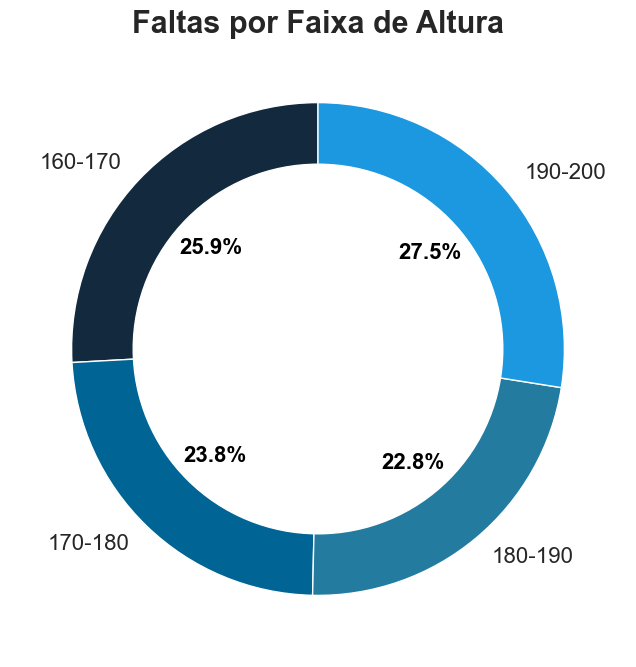

In [65]:
# Criando categorias de altura
def categorizar_altura(altura):
    if 160 <= altura < 170:
        return "160-170"
    elif 170 <= altura < 180:
        return "170-180"
    elif 180 <= altura < 190:
        return "180-190"
    elif 190 <= altura <= 200:
        return "190-200"
    return "Outros"

df_sem_colunas['Faixa_Altura'] = df_sem_colunas['Altura_cm'].apply(categorizar_altura)

# Somar os gols por faixa de altura
gols_por_altura = df_sem_colunas.groupby('Faixa_Altura')['Faltas_Cometidas'].sum()

# Criando o gráfico de pizza estilo donut
plt.figure(figsize=(8, 8))
colors = ["#13293D", "#006494", "#247BA0", "#1B98E0"]
wedges, texts, autotexts = plt.pie(
    gols_por_altura, labels=gols_por_altura.index, autopct='%1.1f%%', startangle=90,
    colors=colors, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 16}
)

# Ajustar a posição dos valores para melhor legibilidade
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_size(16)

# Criando o círculo central para dar o efeito de donut
centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Faltas por Faixa de Altura", fontsize=22, fontweight='bold')

# Exibindo o gráfico
plt.show()


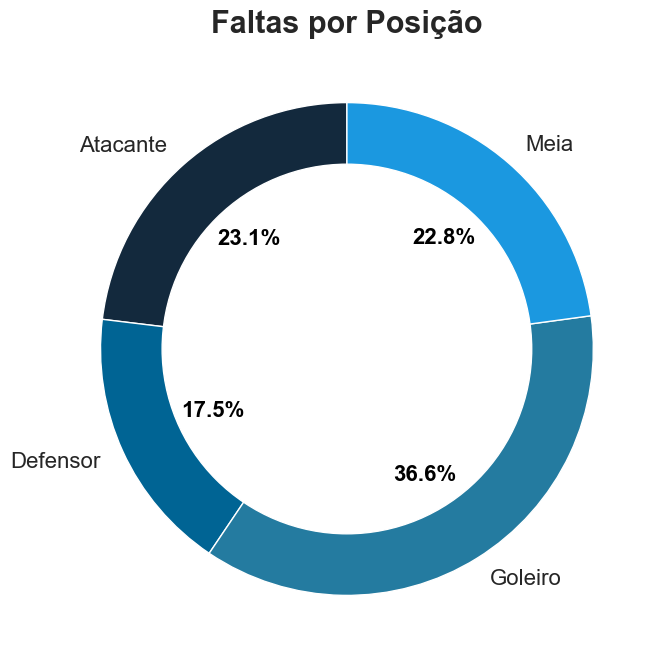

In [67]:
# Somar as faltas cometidas por posição
faltas_por_posicao = df_sem_colunas.groupby('Posição')['Faltas_Cometidas'].sum()

# Criando o gráfico de pizza estilo donut para faltas por posição
plt.figure(figsize=(8, 8))
colors = ["#13293D", "#006494", "#247BA0", "#1B98E0"]
wedges, texts, autotexts = plt.pie(
    faltas_por_posicao, labels=faltas_por_posicao.index, autopct='%1.1f%%', startangle=90,
    colors=colors, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 16}
)

# Ajustar a posição dos valores para melhor legibilidade
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_size(16)

# Criando o círculo central para dar o efeito de donut
centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Faltas por Posição", fontsize=22, fontweight='bold')

# Exibindo o gráfico
plt.show()